<a href="https://colab.research.google.com/github/Raredorsa/Dorsa-s-Pub/blob/main/NHANES1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file_path = 'nhanes_merged.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(file_path)

print(df.head())


      SEQN   Age  Gender  Race/Ethnicity  Education  Marital_Status   PIR  \
0  83732.0  62.0     1.0             3.0        5.0             1.0  4.39   
1  83733.0  53.0     1.0             3.0        3.0             3.0  1.32   
2  83734.0  78.0     1.0             3.0        3.0             1.0  1.51   
3  83735.0  56.0     2.0             3.0        5.0             6.0  5.00   
4  83736.0  42.0     2.0             4.0        4.0             3.0  1.23   

   Diabetes  Insulin  Diabetes_Pills  ...  Pulse regular/irregular  \
0       1.0      2.0             2.0  ...                      1.0   
1       0.0      2.0             2.0  ...                      1.0   
2       1.0      2.0             2.0  ...                      1.0   
3       0.0      1.0             1.0  ...                      1.0   
4       0.0      2.0             2.0  ...                      1.0   

   Diastolic BP (mm Hg)  Systolic BP (mm Hg)  Food D1 protein (g)  \
0                  70.0                128.0   

In [ ]:
data_path = 'nhanes_merged.csv'
data = pd.read_csv(data_path)
features = data.drop(columns=['Diabetes'])

labels = data['Diabetes']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

In [ ]:
!pip install qiskit scikit-learn pandas matplotlib seaborn qiskit_aer qiskit_machine_learning
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.0 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512548 sha256=6c96462dfb87ed162d2f942c78a7f669ee507b27f184af40045ef81f952cf8cd
  S

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value

In [ ]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.95
Classical SVC on the test dataset:     0.95


In [ ]:
import matplotlib.pyplot as plt

# تنظیم اندازه‌ی نمودار
plt.figure(figsize=(12, 8), dpi=100)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=50)

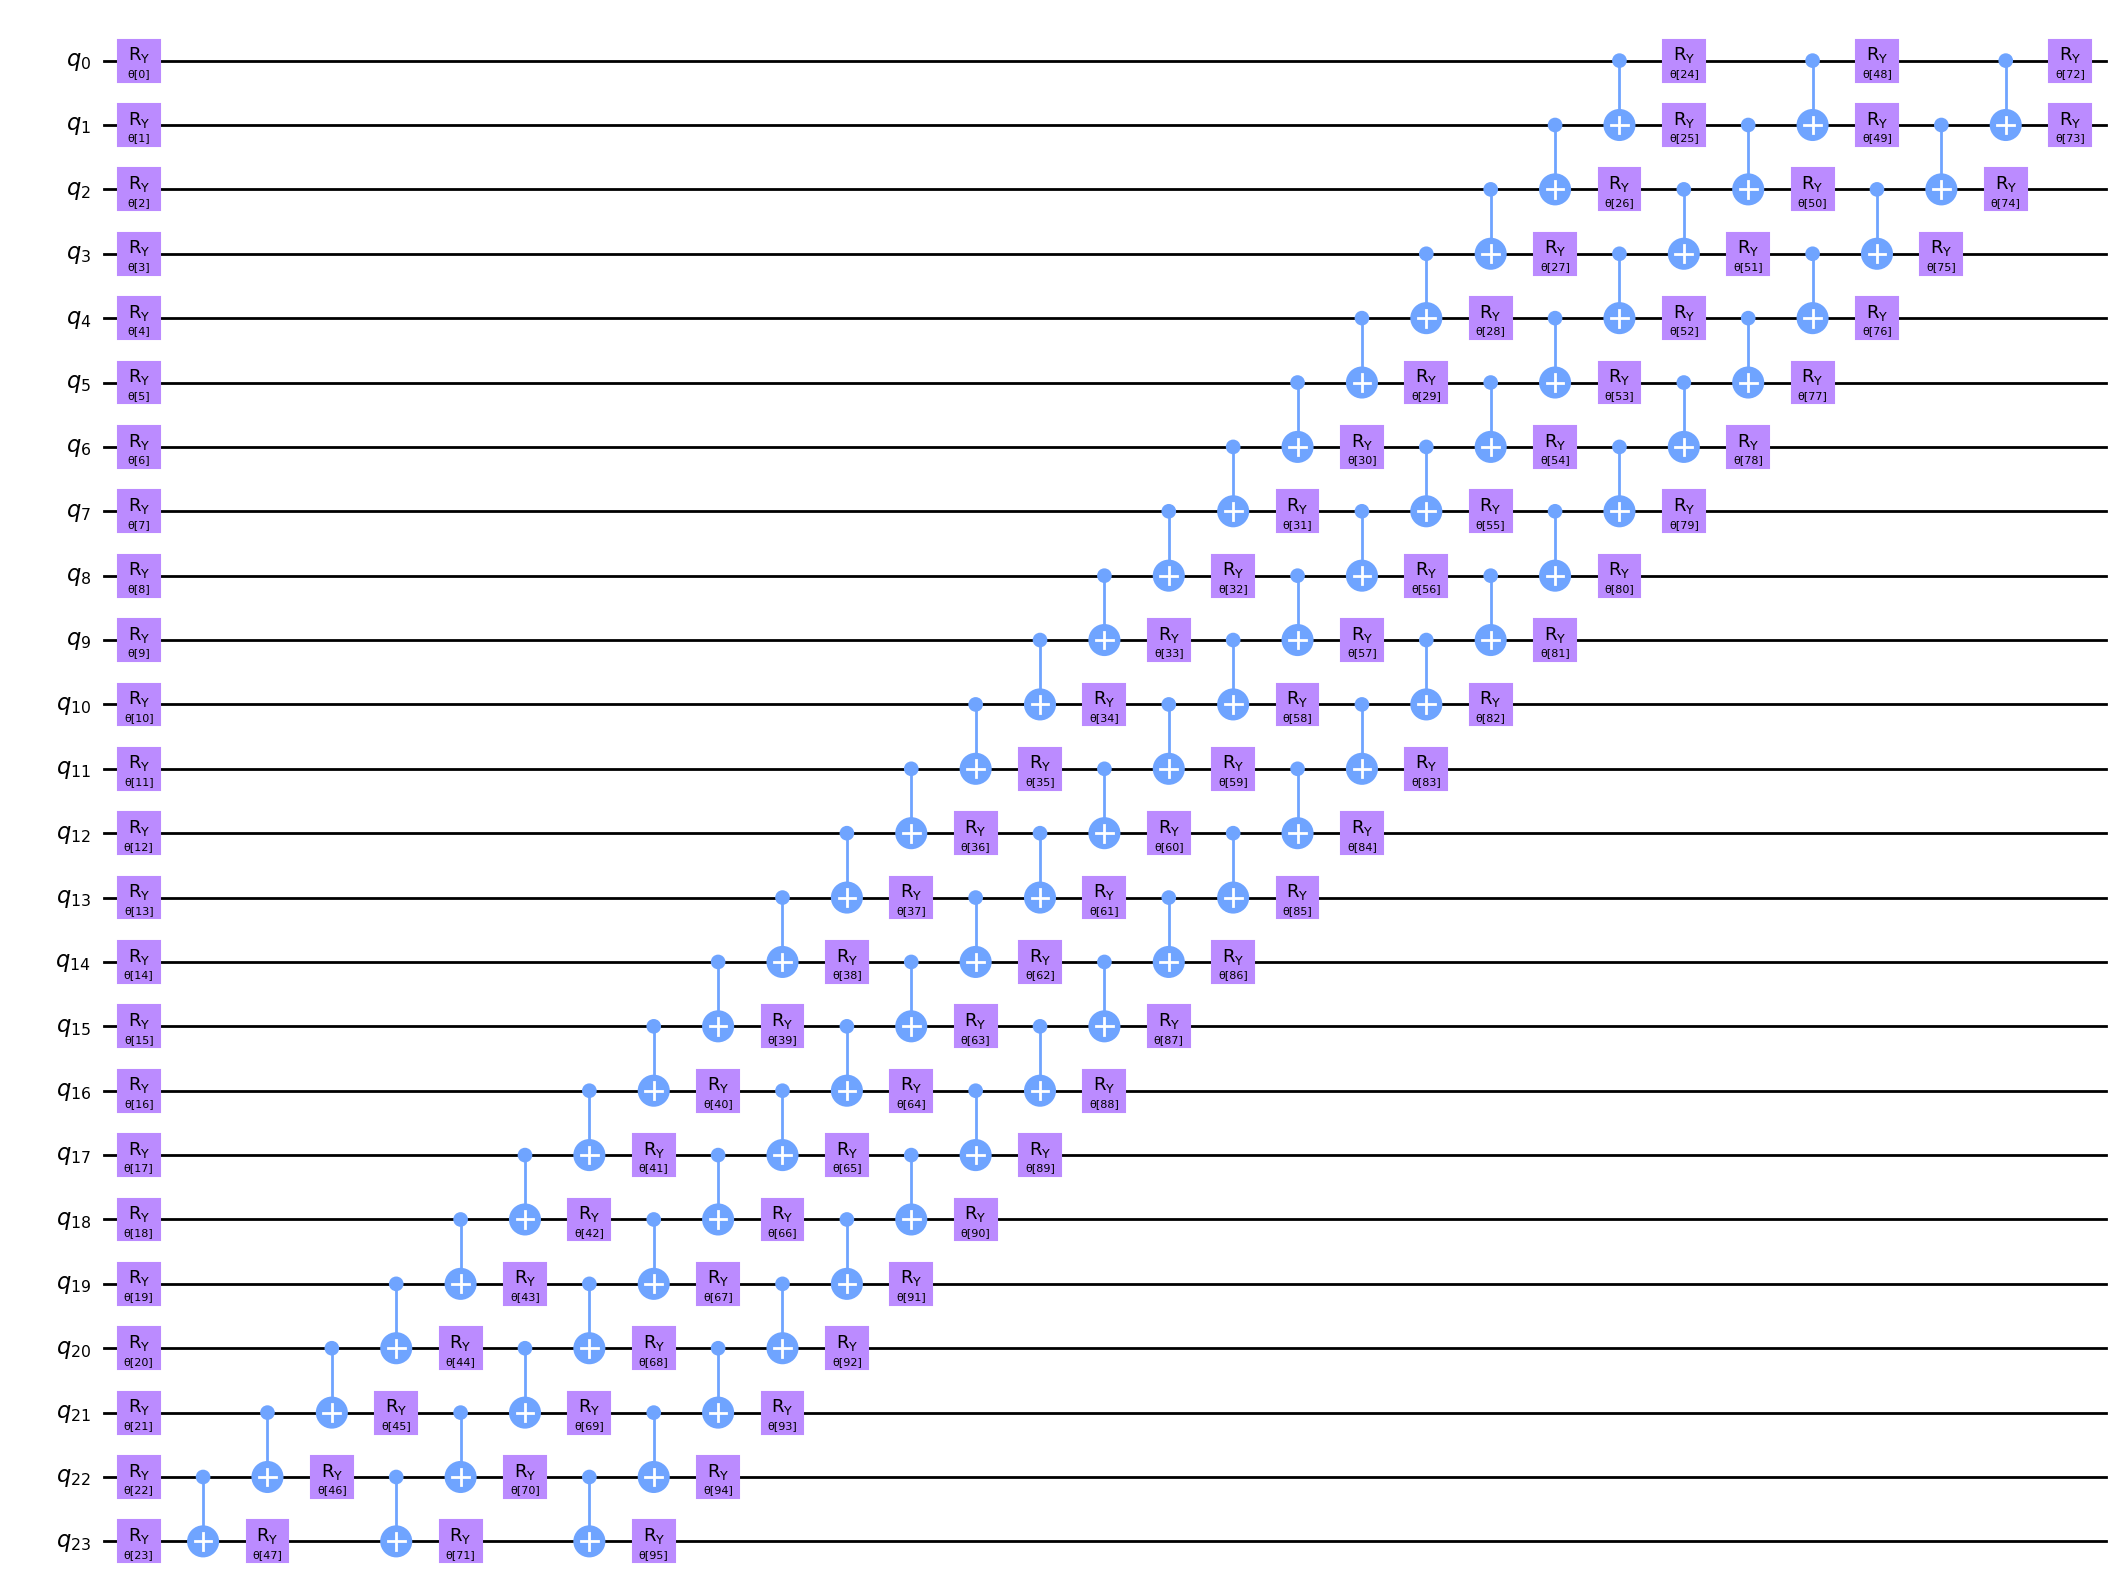

In [ ]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=50)

In [ ]:
from qiskit_algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=40)

In [ ]:
from qiskit.primitives import Sampler

sampler = Sampler()

<ipython-input-16-149a83ca69cc>:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
import numpy as np
import qiskit
from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap, TwoLocal
from qiskit.primitives import Sampler
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import VQC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

selected_features = ['Age', 'Gender', 'PIR', 'Diabetes']
data = data[selected_features].dropna()

train_data, test_data = train_test_split(data, test_size=0.9, random_state=123)

train_features = train_data.drop(columns=['Diabetes'])
train_labels = train_data['Diabetes']
test_features = test_data.drop(columns=['Diabetes'])
test_labels = test_data['Diabetes']

scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

feature_map = ZZFeatureMap(feature_dimension=train_features_scaled.shape[1], reps=2)
ansatz = TwoLocal(train_features_scaled.shape[1], ['ry', 'rz'], 'cz', reps=2)

optimizer = COBYLA(maxiter=100)
sampler = Sampler()

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer
)

train_labels = train_labels.values
test_labels = test_labels.values

vqc.fit(train_features_scaled, train_labels)

predictions = vqc.predict(test_features_scaled)

accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


<ipython-input-18-3481d4c08878>:31: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Accuracy: 66.00%


In [ ]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.62
Quantum VQC on the test dataset:     0.63


In [ ]:
from qiskit_algorithms.optimizers import SPSA

# Try different ansatz and optimizer
ansatz = TwoLocal(train_features_scaled.shape[1], ['ry', 'rz'], 'cz', reps=3)  # Increase reps
optimizer = SPSA(maxiter=200)  # Use SPSA optimizer

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer
)

# Train the model
vqc.fit(train_features_scaled, train_labels)

# Evaluate the accuracy
predictions = vqc.predict(test_features_scaled)
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 65.71%
